In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyodbc 
from datetime import datetime, timedelta

In [20]:
# Some other example server values are
# server = 'localhost\sqlexpress' # for a named instance
# server = 'myserver,port' # to specify an alternate port
server = 'tcp:200.200.200.1' 
database = 'taiyopivot' 
username = 'usr_taiyo' 
password = 'imation' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)
cursor = cnxn.cursor()

In [21]:
sql=f"""
select   year(fmdate) as periodyear
,month(fmdate) as periodmonth
, fseccode as departmentid
, sum(CASE left(fmovecode,1)     WHEN '4' THEN  fqty  WHEN '2' THEN  fqty*-1  Else 0    END)AS fqty 
, sum(CASE left(fmovecode,1)     WHEN '4' THEN  famount  WHEN '2' THEN  famount*-1  Else 0    END)AS famount 

From taiyo.dbo.sd22fdly a with (nolock) 
where fpdcode<>''  and  isnull(fwono,'') <> ''  
and left(fmovecode,2) in ('22','42')  
and year(fmdate) in('2022','2023')
and   fwono in ( select WONo from  WOOrders with(nolock)  where  ProductLineid = '101'  ) 
and   fseccode in ('1202' ,'1203','1204','1205')
Group by  year(fmdate) ,month(fmdate),  fseccode 
order by periodmonth,periodyear

"""
 

card= pd.read_sql(sql, cnxn)

card.head(20)

C:\Users\PARMAN\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,periodyear,periodmonth,departmentid,fqty,famount
0,2022,1,1203,168245.00,557628.43
1,2022,1,1202,151888.07,6951195.78
2,2022,1,1205,237548.60,1673300.14
3,2022,1,1204,16531.23,1105511.42
4,2023,1,1202,150657.09,7662217.89
5,2023,1,1205,186819.20,1554046.85
6,2023,1,1203,130653.00,451468.07
7,2023,1,1204,28949.04,982601.39
8,2022,2,1204,25215.11,1352781.06
9,2022,2,1202,143985.82,6627306.27


In [22]:
payroll=pd.read_excel("salaryperiod.xlsx")
payroll.head()


,tCloseDate,divisionid,deptid,sthainame,dSalary,iPeriodNumber,iEmpWorkPayType,iEmpPayPeriod,periodyear,perioddate
0,2021-02-15,207,3081,ออกแบบ,2046.0,3,1,1,2021,2
1,2021-02-28,207,3081,ออกแบบ,1488.0,4,1,1,2021,2
2,2021-03-15,207,3081,ออกแบบ,1674.0,5,1,1,2021,3
3,2021-03-31,207,3081,ออกแบบ,1674.0,6,1,1,2021,3
4,2021-04-15,207,3081,ออกแบบ,372.0,7,1,1,2021,4


In [68]:
payroll['deptid']= payroll['deptid'].astype(str)

In [24]:
# function_dictionary = {'OrderID':'count','Quantity':'mean'}
# df.groupby("Product_Category").aggregate(function_dictionary)

# gk.get_group('Boston Celtics')

# df.groupby([df.index.year, df.index.quarter])["co"].agg(["max", "min"])

# *** loop
# wo = card.groupby(["WONo","WOLineid","RefWOno"])
# for  name,wono in wo:
#     print(name[0])
#     print(wono.WONo)

# ** use name[0]  for filter


# dep = payroll.groupby(["sCode2","sThaiName"])


In [ ]:
# for  name,item in dep:
#     # print(item)
#     print(name[0],name[1])


1011.0 คลังสำเร็จรูป
1011.0 นักศึกษาฝึกงาน
1011.0 พนักงาน
1011.0 หัวหน้าทีม
1011.0 หัวหน้าหน่วย
1013.0 คลังวัตถุดิบ
1013.0 นักศึกษาฝึกงาน
1013.0 พนักงาน
1013.0 หัวหน้าทีม
1013.0 หัวหน้าหน่วย
1013.0 เจ้าหน้าที่
1021.0 ธุรการบุคคล
1021.0 พนักงาน
1022.0 ทรัพยากรบุคคลและธุรการ
1022.0 นักศึกษาฝึกงาน
1022.0 พนักงาน
1022.0 เจ้าหน้าที่
1031.0 นักศึกษาฝึกงาน
1031.0 สารสนเทศ
1042.0 การเงิน
1042.0 นักศึกษาฝึกงาน
2051.0 นักศึกษาฝึกงาน
2051.0 บริหารการตลาด
2065.0 ธุรการขาย
2065.0 นักศึกษาฝึกงาน
2066.0 นักศึกษาฝึกงาน
2066.0 บริการติดตั้ง
2066.0 พนักงาน
2066.0 หัวหน้าทีม
2066.0 หัวหน้าหน่วย
2066.0 เจ้าหน้าที่
2066.1 จัดส่ง
2066.1 นักศึกษาฝึกงาน
2066.1 พนักงาน
2066.1 หัวหน้าทีม
2066.1 หัวหน้าหน่วย
2067.0 จัดส่ง
2067.0 นักศึกษาฝึกงาน
2067.0 พนักงาน
2067.0 หัวหน้าทีม
2067.0 หัวหน้าหน่วย
2067.0 เจ้าหน้าที่
3071.0 ควบคุมคุณภาพ
3071.0 นักศึกษาฝึกงาน
3071.0 พนักงาน
3071.0 หัวหน้าทีม
3071.0 เจ้าหน้าที่
3081.0 นักศึกษาฝึกงาน
3081.0 ออกแบบ
3083.0 นักศึกษาฝึกงาน
3083.0 วิจัยและพัฒนา
3083.0 หัวหน้าหน่วย
3083.0 เ

In [25]:
# payrolldep = payroll[((payroll.sCode2==4102) & (payroll.CloseDate=="tCloseDate"))]
# payrolldep 

In [30]:
data=[
  {
    "Departmentid": "1202",
    "DepPayroll": "4102",
    "DepPayrollname": "ปั๊ม",
    "CreateBy": "admin",
    "CreateDate": "2009-11-30T15:45:48.683",
    "LastupdateBy": "admin",
    "LastupdateDate": "2009-11-30T15:45:48.683"
  },
  {
    "Departmentid": "1203",
    "DepPayroll": "4103",
    "DepPayrollname": "อาร์ค",
    "CreateBy": "admin",
    "CreateDate": "2009-11-30T15:45:48.683",
    "LastupdateBy": "admin",
    "LastupdateDate": "2009-11-30T15:45:48.683"
  },
  {
    "Departmentid": "1204",
    "DepPayroll": "4104",
    "DepPayrollname": "สี",
    "CreateBy": "admin",
    "CreateDate": "2009-11-30T15:45:48.683",
    "LastupdateBy": "admin",
    "LastupdateDate": "2009-11-30T15:45:48.683"
  },
  {
    "Departmentid": "1205",
    "DepPayroll": "4105",
    "DepPayrollname": "ประกอบ",
    "CreateBy": "admin",
    "CreateDate": "2009-11-30T15:45:48.683",
    "LastupdateBy": "admin",
    "LastupdateDate": "2009-11-30T15:45:48.683"
  }
]

department=pd.DataFrame(data)
department.head()


,Departmentid,DepPayroll,DepPayrollname,CreateBy,CreateDate,LastupdateBy,LastupdateDate
0,1202,4102,ปั๊ม,admin,2009-11-30T15:45:48.683,admin,2009-11-30T15:45:48.683
1,1203,4103,อาร์ค,admin,2009-11-30T15:45:48.683,admin,2009-11-30T15:45:48.683
2,1204,4104,สี,admin,2009-11-30T15:45:48.683,admin,2009-11-30T15:45:48.683
3,1205,4105,ประกอบ,admin,2009-11-30T15:45:48.683,admin,2009-11-30T15:45:48.683


In [34]:
period=range(1,13)
period

range(1, 13)

In [35]:
for i in period:
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12


In [ ]:
# def findproccesstime(DeliveryDate,departmentid):
#     processtime =0

#     jobdepweek = jobweek[(jobweek.DeliveryDate==DeliveryDate) & (jobweek.departmentid==departmentid)]
#     processtime = jobdepweek.processtime.sum()
#     return processtime




In [48]:
carddep =card[(card.periodyear==2023)& (card.periodmonth==1) & (card.departmentid=="1202")]
carddep.famount.sum()

7662217.890000012

In [92]:
carddep =card[(card.periodyear==2023)& (card.periodmonth==1) ]

# carddep.famount.sum()


In [94]:
carddep2 =carddep[(carddep.departmentid=="1202")| (carddep.departmentid=="1203") ]
carddep2.famount.sum()


8113685.960000012

In [96]:
def findcard(periodyear,periodmonth,departmentid):
    result=0


    if departmentid=="1202" :
        carddep =card[(card.periodyear==periodyear)& (card.periodmonth==periodmonth) & (card.departmentid==departmentid)]
        result = carddep.famount.sum()
    elif departmentid=="1203" :
        carddep =card[(card.periodyear==periodyear)& (card.periodmonth==periodmonth) ]
        carddep2 =carddep[(carddep.departmentid=="1202")| (carddep.departmentid=="1203") ]
        result =carddep2.famount.sum()      
    elif departmentid=="1204" :
        carddep =card[(card.periodyear==periodyear)& (card.periodmonth==periodmonth) ]
        carddep2 =carddep[(carddep.departmentid=="1202")| (carddep.departmentid=="1203")| (carddep.departmentid=="1204") ]
        result =carddep2.famount.sum() 
    elif departmentid=="1205" :
        carddep =card[(card.periodyear==periodyear)& (card.periodmonth==periodmonth) ]
        carddep2 =carddep[(carddep.departmentid=="1202")| (carddep.departmentid=="1203")| (carddep.departmentid=="1204")| (carddep.departmentid=="1205") ]
        result =carddep2.famount.sum() 
    return result

In [69]:

payrolldep =payroll[(payroll.periodyear==2021)& (payroll.perioddate==1) & (payroll.deptid=="3081")]
payrolldep.dSalary.sum()
    

7440.0

In [71]:
def findpayroll(periodyear,periodmonth,departmentid):
    result=0


    payrolldep =payroll[(payroll.periodyear==periodyear)& (payroll.perioddate==periodmonth) & (payroll.deptid==departmentid)]
    result=payrolldep.dSalary.sum()
    
 
    return result

In [63]:
result=findcard(2022,1,"1202")
result

6951195.780000007

In [113]:
result=[]

for index,item in department[:].iterrows():
    # print(item.Departmentid,index)
    for fmonth in period[:]:
        # print(fmonth)
        issueamount=findcard(2023,fmonth,item.Departmentid)
        salaryamount=findpayroll(2023,fmonth,item.DepPayroll)

        percentlabor =0
        if issueamount>0 : 
            percentlabor=(salaryamount*100)/issueamount

        
        result+=[
            {
                "department":item.Departmentid,
                "period": fmonth,
                "issueamount" : issueamount,
                "salaryamount" : salaryamount,
                "percentlabor" : percentlabor,


            }
        ]


result

[{'department': '1202',
  'period': 1,
  'issueamount': 7662217.890000012,
  'salaryamount': 291582.0,
  'percentlabor': 3.8054516875661384},
 {'department': '1202',
  'period': 2,
  'issueamount': 5979172.190000002,
  'salaryamount': 277912.8,
  'percentlabor': 4.648014661039556},
 {'department': '1202',
  'period': 3,
  'issueamount': 7147777.199999998,
  'salaryamount': 282242.0,
  'percentlabor': 3.948668125805601},
 {'department': '1202',
  'period': 4,
  'issueamount': 4914781.529999995,
  'salaryamount': 278164.0,
  'percentlabor': 5.659742926558941},
 {'department': '1202',
  'period': 5,
  'issueamount': 5490206.06999999,
  'salaryamount': 286685.0,
  'percentlabor': 5.221752996969029},
 {'department': '1202',
  'period': 6,
  'issueamount': 5967297.019999977,
  'salaryamount': 282598.0,
  'percentlabor': 4.735779014398735},
 {'department': '1202',
  'period': 7,
  'issueamount': 6303360.700000006,
  'salaryamount': 277914.0,
  'percentlabor': 4.408981386706931},
 {'department

In [138]:
dfexport =pd.DataFrame(result)
dfexport.to_excel("rpt2023.xlsx")

In [115]:
datadep=dfexport[dfexport.department=="1202"]


In [133]:
#-----ผลลัพธ์ข้อมูล 
#1.แสดงข้อมูลสถิติ   ดูพฤติกรรมของข้อมูล  % ค่าแรงเทียบวัตถุดิบ ช่อง  max=7.84 mean =5.45 

datadep.describe()

,period,issueamount,salaryamount,percentlabor
count,12.000000,1.200000e+01,12.000000,12.000000
mean,6.500000,5.419951e+06,277447.566667,5.451470
std,3.605551,1.415673e+06,8022.192235,1.415648
min,1.000000,3.357313e+06,263498.000000,3.805452
25%,3.750000,4.203103e+06,273325.000000,4.365769
50%,6.500000,5.728752e+06,277913.400000,4.978766
75%,9.250000,6.341658e+06,282331.000000,6.553010
max,12.000000,7.662218e+06,291582.000000,7.848480


<AxesSubplot:>

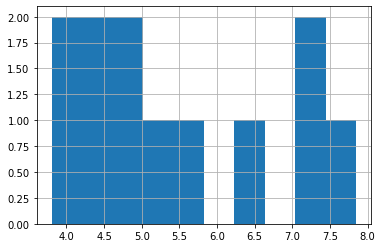

In [135]:
#2.plot กราฟ ฮิตโตเกรม  เพื่อดูการกระจายของข้อมูล ว่าข้อมูลส่วนใหญ่ ไปกรองอยู่ตรงไหน 
# 2.1 ฝั่ง% ค่าแรงเทียบเบิกวัตถุดิบ  ที่แกน  y 
datadep.percentlabor.hist()

<AxesSubplot:>

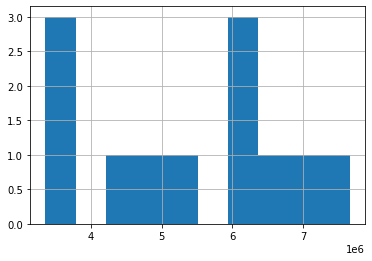

In [118]:

# 2.2  ฝั่งวัตถุดิบ issueamount ที่แกน  y 
datadep.issueamount.hist()

<AxesSubplot:>

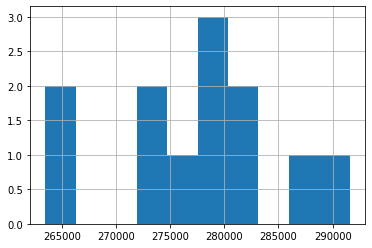

In [136]:

# 2.3  ฝั่งค่าแรง salaryamount ที่แกน  y
datadep.salaryamount.hist()

<AxesSubplot:>

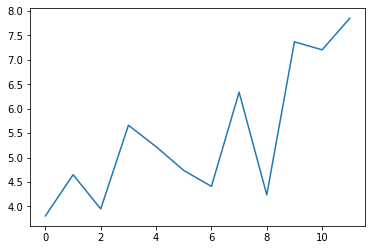

In [137]:
# 3 plot กราฟ พาราโต้  เพื่อดูแนวโน้ม กระโดด ผิดปกติ  ของข้อมูล
# 3.1 ฝั่ง% ค่าแรงเทียบเบิกวัตถุดิบ  ที่แกน  y 
datadep.percentlabor.plot()

<AxesSubplot:>

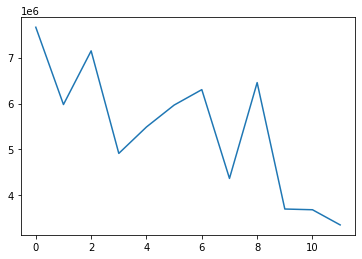

In [121]:
# 3.2 ฝั่งวัตถุดิบ issueamount ที่แกน  y 
datadep.issueamount.plot()

<AxesSubplot:>

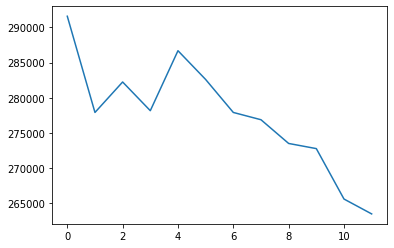

In [122]:
# 3.3 ฝั่งค่าแรง salaryamount ที่แกน  y
datadep.salaryamount.plot()

In [129]:
#กรณีใช้ Matplotlib

#1.กำหนดค่า x   รอบเดือน 1-12  
x =range(1,13)

In [127]:
#2.กำหนด ค่า y    
y=datadep.percentlabor

In [128]:
x,y

(range(1, 13),
 0     3.805452
 1     4.648015
 2     3.948668
 3     5.659743
 4     5.221753
 5     4.735779
 6     4.408981
 7     6.336415
 8     4.236132
 9     7.365423
 10    7.202796
 11    7.848480
 Name: percentlabor, dtype: float64)

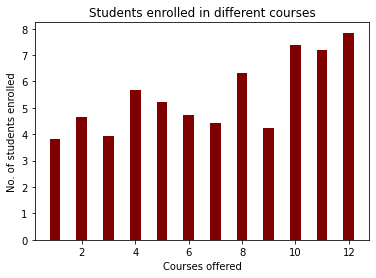

In [132]:

# plot กราฟ โยนค่า x,y  ใน plt.bar

plt.bar(x, y, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.savefig("jan.jpg") 
plt.show()
